In [ ]:
import pandas as pd 

sentences= [
    "The cat sits on the laptop.",
    "The dog plays in the garden.",
    "A dermatologist examines a skin lesion.",
    "The laptop is on the desk.",
    "A cat sleeps on the sofa.",
    "Skin cancer screening uses dermatoscopic images.",

]

df= pd.DataFrame({"id":range(len(sentences)), "text": sentences})

In [2]:
df.head()

,id,text
0,0,The cat sits on the laptop.
1,1,The dog plays in the garden.
2,2,A dermatologist examines a skin lesion.
3,3,The laptop is on the desk.
4,4,A cat sleeps on the sofa.


In [3]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')

text = df['text'].tolist()  
embeddings = model.encode(text, normalize_embeddings=True)
embeddings


/Users/dimtriospanagoulias/miniconda3/envs/LLMs/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


array([[ 0.07989159,  0.01103974,  0.0129266 , ...,  0.11939684,
         0.01614957,  0.01953349],
       [ 0.01984323, -0.06914533,  0.03175547, ...,  0.0417972 ,
         0.03379736,  0.00261817],
       [ 0.02473116,  0.05748651,  0.0025191 , ..., -0.00720574,
         0.05099291,  0.03965486],
       [-0.05604455,  0.07240255, -0.00625822, ...,  0.08521689,
        -0.01731284,  0.01014534],
       [ 0.16454664, -0.06970539, -0.05010757, ...,  0.05649327,
         0.05058397, -0.00210353],
       [ 0.02924137,  0.10735992, -0.03003722, ..., -0.04958897,
         0.08695792,  0.03298291]], dtype=float32)

In [4]:
import numpy as np

df["embeddings"] =[emb.tolist() for emb in embeddings]

df.head()

,id,text,embeddings
0,0,The cat sits on the laptop.,"[0.07989159226417542, 0.011039737612009048, 0...."
1,1,The dog plays in the garden.,"[0.019843226298689842, -0.0691453292965889, 0...."
2,2,A dermatologist examines a skin lesion.,"[0.024731162935495377, 0.05748651176691055, 0...."
3,3,The laptop is on the desk.,"[-0.05604454502463341, 0.07240255177021027, -0..."
4,4,A cat sleeps on the sofa.,"[0.1645466387271881, -0.06970538944005966, -0...."


In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)
emb_2d = pca.fit_transform(embeddings)
df["x"]= emb_2d[:,0]
df["y"]= emb_2d[:,1]
df[["text","x","y"]]

,text,x,y
0,The cat sits on the laptop.,-0.541665,-0.266438
1,The dog plays in the garden.,-0.253714,0.887384
2,A dermatologist examines a skin lesion.,0.734076,0.016722
3,The laptop is on the desk.,-0.180685,-0.381339
4,A cat sleeps on the sofa.,-0.503665,-0.152705
5,Skin cancer screening uses dermatoscopic images.,0.745654,-0.103624


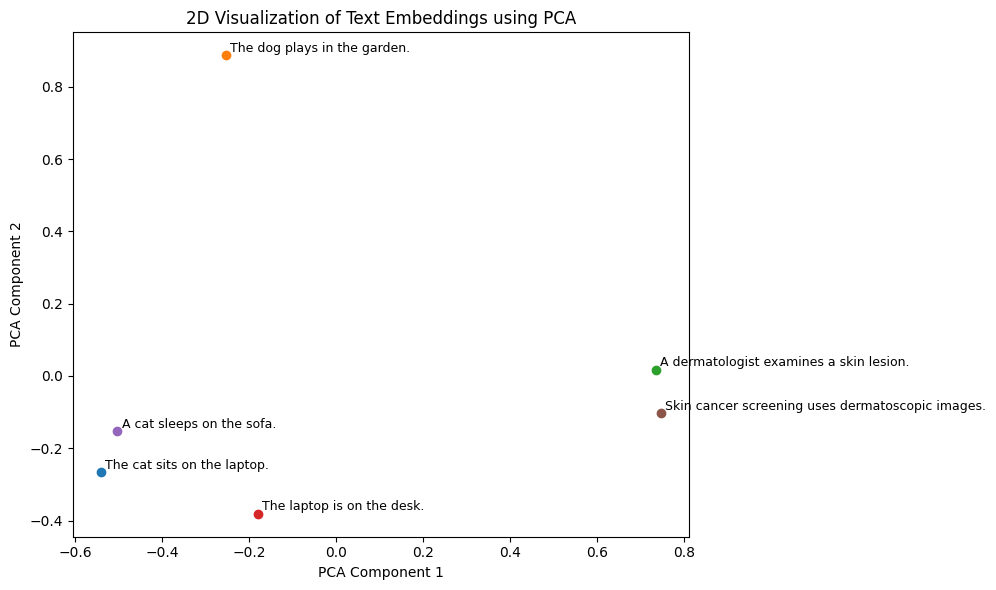

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
for i, row in df.iterrows():
    plt.scatter(row['x'], row['y'])
    plt.text(row['x']+0.01, row['y']+0.01, row['text'], fontsize=9)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D Visualization of Text Embeddings using PCA')
plt.tight_layout()
plt.show()